# INFOTECH ACADEMY MACHINE LEARNING-1 HOMEWORK

In [70]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
    

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 
from sklearn.impute import SimpleImputer # kategorik degerleri doldurmak icin
from sklearn.preprocessing import LabelEncoder,OneHotEncoder # To convert categorical data to numeric data
import scipy.stats as stats   # normality test for numeric coloumns
import statsmodels.api as sm  # qq plot
from sklearn.preprocessing import MinMaxScaler  # normalizasyon
from sklearn.model_selection import train_test_split  # split data 
from sklearn.metrics import f1_score     # 
#from sklearn.model_selection import GridSearchCV # cross validation

### Load Dataset

In [72]:
df = pd.read_csv('titanic_dataset.csv')
df.head()

,Unnamed: 0,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


##### PassengerId - 
A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
##### HomePlanet - 
The planet the passenger departed from, typically their planet of permanent residence.
##### CryoSleep - 
Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
##### Cabin - 
The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
##### Destination - 
The planet the passenger will be debarking to.
##### Age - 
The age of the passenger.
##### VIP - 
Whether the passenger has paid for special VIP service during the voyage.
###### RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - 
Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
##### Name - 
The first and last names of the passenger.
##### Transported -
Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

## Step 1: Define the Problem

Clearly define the problem you want to solve using the Titanic dataset. For example, you could predict whether a passenger survived or not based on various features.

### 💡 The purpose of this project is to predict which passengers will or will not be transported to an alternative dimension.

## Step 2: Gather and Explore the Data

Obtain the Titanic dataset from a reliable source, such as Kaggle.
Explore the dataset to understand its structure and variables.
Identify the features that are available and their potential relevance to the problem.

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    12970 non-null  int64  
 1   PassengerId   12970 non-null  object 
 2   HomePlanet    12682 non-null  object 
 3   CryoSleep     12660 non-null  object 
 4   Cabin         12671 non-null  object 
 5   Destination   12696 non-null  object 
 6   Age           12700 non-null  float64
 7   VIP           12674 non-null  object 
 8   RoomService   12707 non-null  float64
 9   FoodCourt     12681 non-null  float64
 10  ShoppingMall  12664 non-null  float64
 11  Spa           12686 non-null  float64
 12  VRDeck        12702 non-null  float64
 13  Name          12676 non-null  object 
 14  Transported   12970 non-null  bool   
dtypes: bool(1), float64(6), int64(1), object(7)
memory usage: 1.4+ MB


In [74]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,12970.0,3617.887741,2408.607419,0.0,1621.0,3242.0,5449.75,8692.0
Age,12700.0,28.771969,14.387261,0.0,19.0,27.0,38.00,79.0
RoomService,12707.0,222.897852,647.596664,0.0,0.0,0.0,49.00,14327.0
FoodCourt,12681.0,451.961675,1584.370747,0.0,0.0,0.0,77.00,29813.0
ShoppingMall,12664.0,174.906033,590.558690,0.0,0.0,0.0,29.00,23492.0
Spa,12686.0,308.476904,1130.279641,0.0,0.0,0.0,57.00,22408.0
VRDeck,12702.0,306.789482,1180.097223,0.0,0.0,0.0,42.00,24133.0


In [75]:
df.nunique()

Unnamed: 0       8693
PassengerId     12970
HomePlanet          3
CryoSleep           2
Cabin            9825
Destination         3
Age                80
VIP                 2
RoomService      1578
FoodCourt        1953
ShoppingMall     1367
Spa              1679
VRDeck           1642
Name            12629
Transported         2
dtype: int64

In [105]:
df= df.drop(columns=["Unnamed: 0"])

In [106]:
categoric_columns=df.select_dtypes(include=["object"])
categoric_columns

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines
...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,False,Jeron Peter
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,False,Matty Scheron
12967,9271_01,Mars,True,D/296/P,55 Cancri e,False,Jayrin Pore
12968,9273_01,Europa,False,D/297/P,NaN,False,Kitakan Conale


In [107]:
numeric_columns = df.select_dtypes(include=np.number)
numeric_columns

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...
12965,34.0,0.0,0.0,0.0,0.0,0.0
12966,42.0,0.0,847.0,17.0,10.0,144.0
12967,NaN,0.0,0.0,0.0,0.0,0.0
12968,NaN,0.0,2680.0,0.0,0.0,523.0


## Step 3: Preprocess the Data

* Handle missing values by imputing or removing them appropriately.
* Detect and handle outliers using techniques such as:
    - **Visualization** : Plot box plots or histograms to identify potential outliers.
    - **Statistical methods**: Calculate z-scores or interquartile ranges to identify and handle outliers.
* Transform categorical variables into numerical representations (e.g., one-hot encoding).
* Normalize or scale numerical features as needed.

In [78]:
df2= df.copy()

In [109]:
df2.isnull().sum()

PassengerId       0
HomePlanet      288
CryoSleep       310
Cabin           299
Destination     274
Age               0
VIP             296
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            294
Transported       0
Total_cost        0
dtype: int64

In [81]:
df2.columns[df2.isnull().any()]

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name'],
      dtype='object')

In [110]:
numeric_columns.isna().sum()

Age             270
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
dtype: int64

### identify columns and percentiles with missing values

In [111]:
missing_percentage = numeric_columns.isnull().mean() * 100

columns_with_missing_values = missing_percentage[missing_percentage > 0]

for column, percentage in columns_with_missing_values.iteritems():
    print(f"{column}' : {percentage:.2f}%")

Age' : 2.08%
RoomService' : 2.03%
FoodCourt' : 2.23%
ShoppingMall' : 2.36%
Spa' : 2.19%
VRDeck' : 2.07%


In [84]:
#the total of expenses made by a passenger was determined and displayed in a new column as total_cost.
cost = df2[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)
df2['Total_cost'] = cost
df2['Total_cost']
df2.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Total_cost
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0


In [113]:
numeric_columns = df2.select_dtypes(include=np.number)

numeric_columns.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_cost
count,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000,12970.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482,1433.221049
std,14.236710,640.996685,1566.618306,583.550067,1117.835494,1167.840416,2807.369708
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,716.000000
75%,37.000000,79.000000,126.000000,47.000000,87.000000,64.000000,1442.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,35987.000000


In [86]:
#Missing values in age column are filled with mean
df2['Age'] = df2['Age'].fillna(df2['Age'].mean())
df2['Age'].isnull().sum()

0

In [87]:
# filling in missing values with imputer
imputer = IterativeImputer() 
df2['RoomService'] = imputer.fit_transform(df2[['RoomService']])
df2['FoodCourt'] = imputer.fit_transform(df2[['FoodCourt']])
df2['ShoppingMall'] = imputer.fit_transform(df[['ShoppingMall']])
df2['Spa'] = imputer.fit_transform(df2[['Spa']])
df2['VRDeck'] = imputer.fit_transform(df2[['VRDeck']])
df2['Total_cost'] = imputer.fit_transform(df2[['Total_cost']])


In [116]:
df2.isna().sum()

PassengerId       0
HomePlanet      288
CryoSleep       310
Cabin           299
Destination     274
Age               0
VIP             296
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            294
Transported       0
Total_cost        0
dtype: int64

# #  **Visualization   für Outliers**

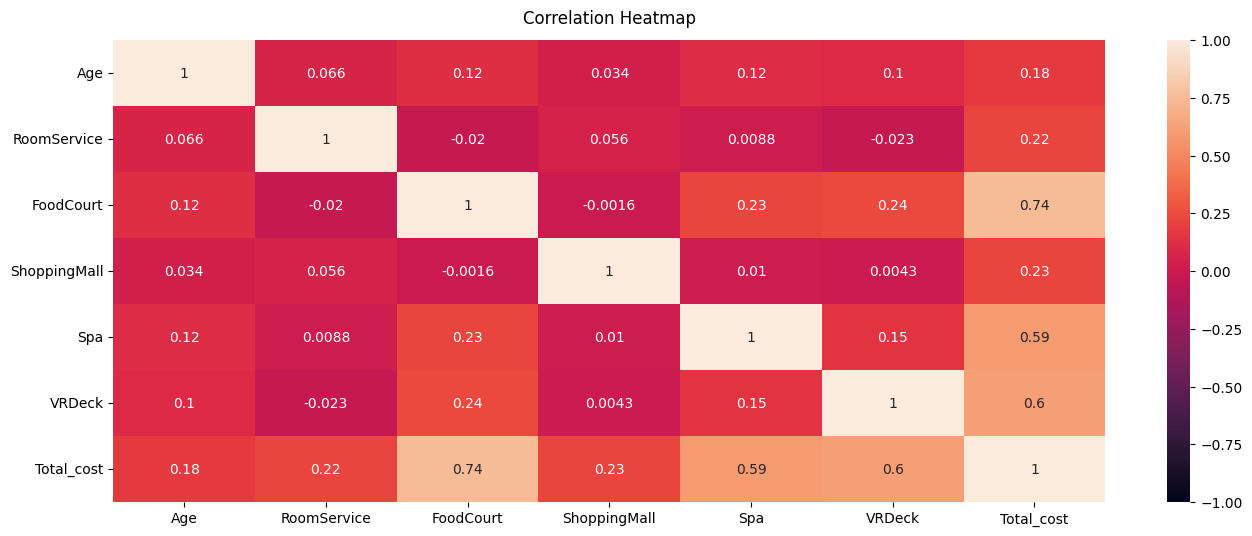

In [117]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(numeric_columns.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

In [118]:
numeric_columns = df2.select_dtypes(include=np.number)
numeric_columns.isna().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Total_cost      0
dtype: int64

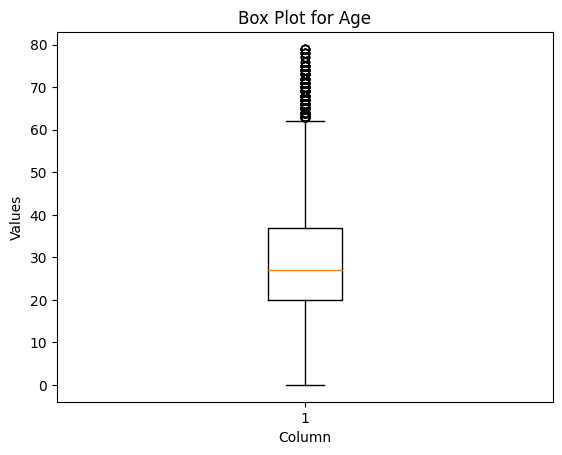

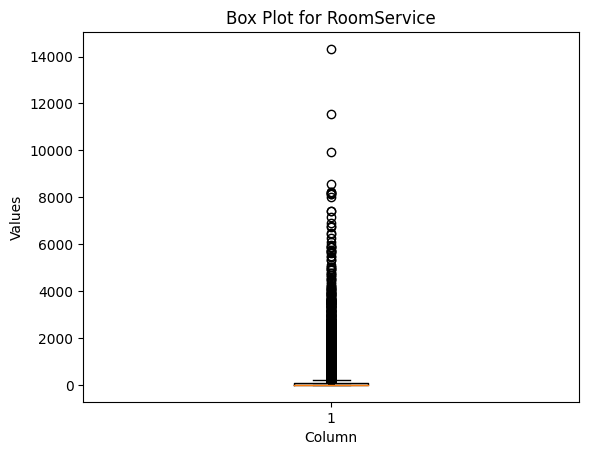

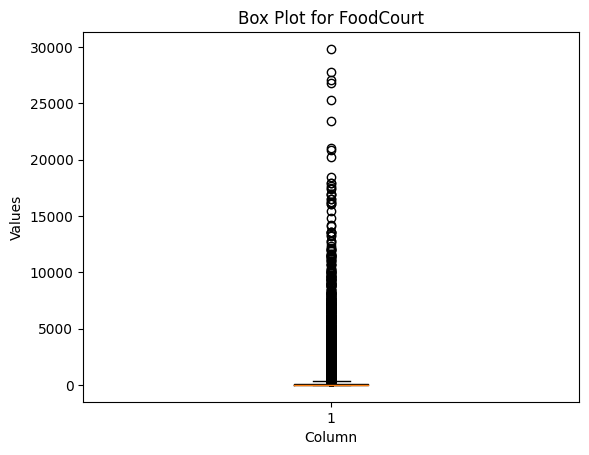

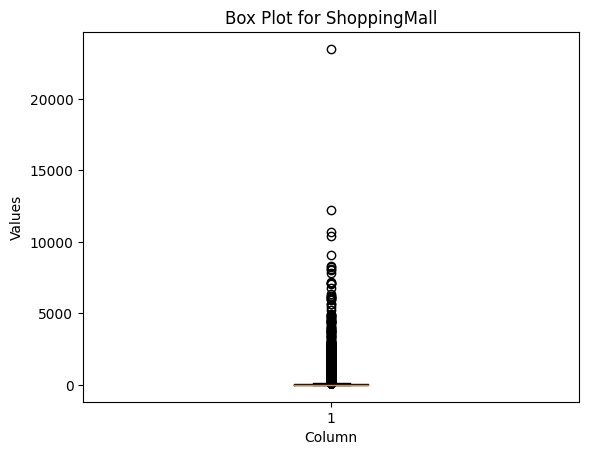

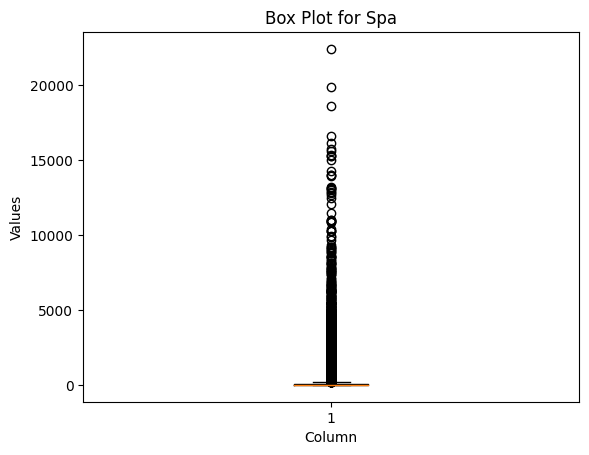

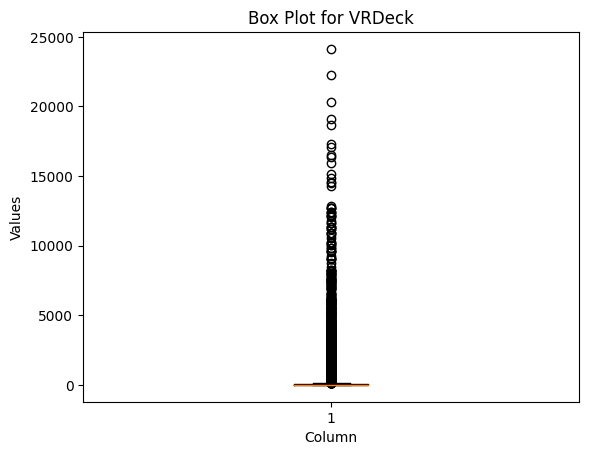

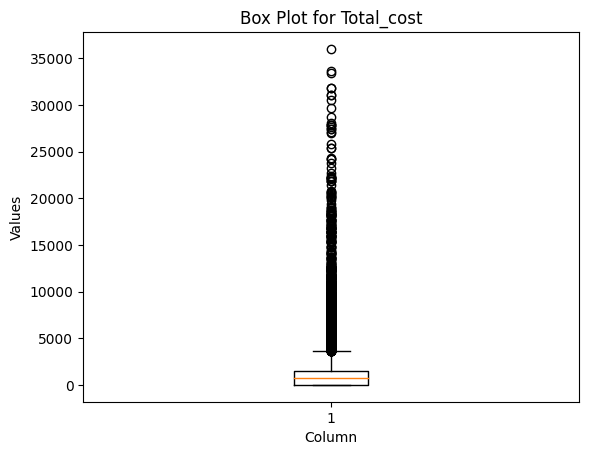

In [92]:
#create box plots foe each numeric column
for column in numeric_columns:
    plt.figure()
    plt.boxplot(df2[column])
    plt.title(f"Box Plot for {column}")
    plt.xlabel("Column")
    plt.ylabel("Values")
    plt.show()

In [119]:
df3 = df2.copy()
df3.head()
#df3.isna().sum()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Total_cost
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0


### Handling Outliers

In [96]:
#outliers bulma 
def find_column_outliers(df3, column_name):
    column = df3[column_name]
    Q1 = np.quantile(column, 0.25)
    Q3 = np.quantile(column, 0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    
    outliers = column[(column < lower_limit) | (column > upper_limit)]
    return outliers

In [97]:
for column in numeric_columns:
    outliers = find_column_outliers(df3, column)
    mean = np.mean(outliers)
    median = np.median(outliers)
    #percentiles = np.percentile(outliers)
    print(f"outliers - {column}:")
    print(f"mean  = {mean}:")
    print(f"median  = {median}:")
    #print(f'percetiles- {percentiles}')
    print(len(outliers))
    # print()

outliers - Age:
mean  = 67.47257383966245:
median  = 66.0:
237
outliers - RoomService:
mean  = 1018.1875946704225:
median  = 715.0:
2746
outliers - FoodCourt:
mean  = 2104.069713675135:
median  = 907.0:
2710
outliers - ShoppingMall:
mean  = 802.8553142423078:
median  = 571.0:
2756
outliers - Spa:
mean  = 1443.749047858344:
median  = 704.0:
2688
outliers - VRDeck:
mean  = 1420.257947276418:
median  = 664.0:
2747
outliers - Total_cost:
mean  = 7833.269712601326:
median  = 6231.0:
1357


In [120]:
# handling otliers 
#Filling outliers with median using IQR method
numeric_columns = ['Age', 'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Total_cost']
def outliers_handling(df3, numeric_columns):
        column = df3[numeric_columns]
        Q1 = np.quantile(df3[column], 0.25)
        Q3 = np.quantile(df3[column], 0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - (1.5 * IQR)
        upper_limit = Q3 + (1.5 * IQR)

        
        handling_outliers = df3[(df3[column] >= lower_limit) & (df3[column] <= upper_limit)].median()
        df3.loc[((df3[column] < lower_limit) | (df3[column] > upper_limit)), 'value'] = handling_outliers

        return df3

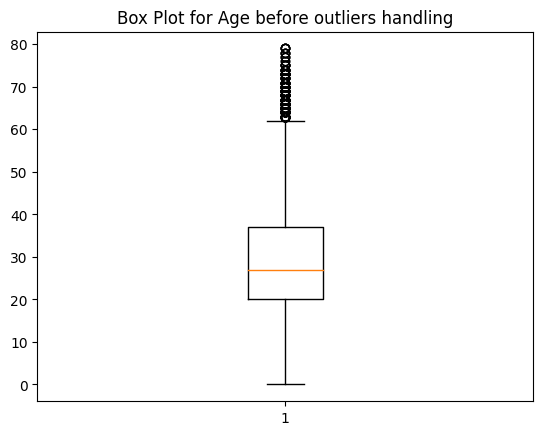

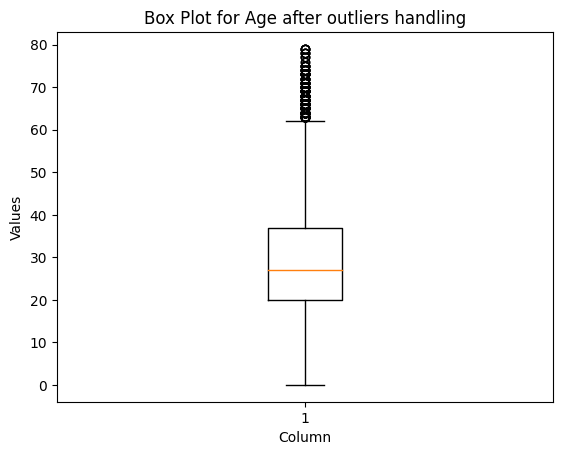

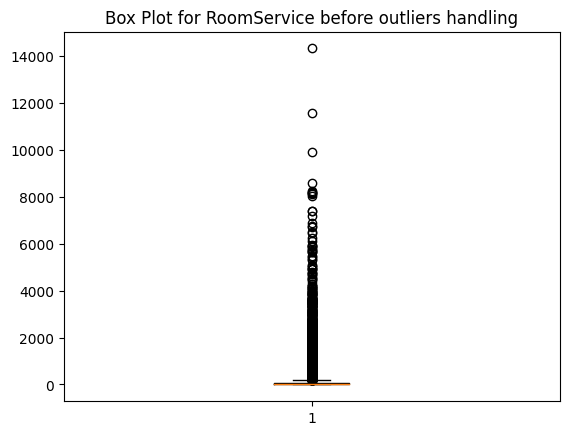

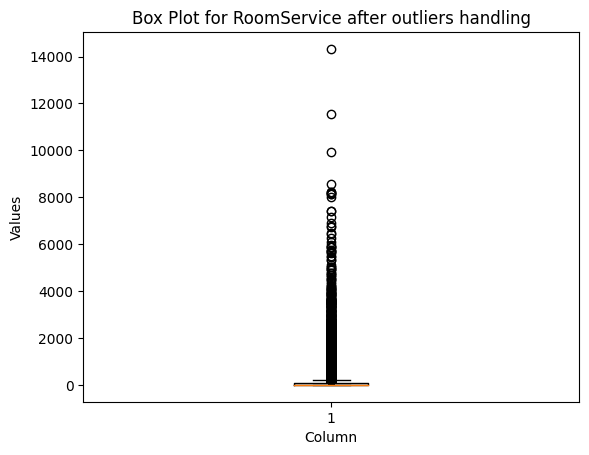

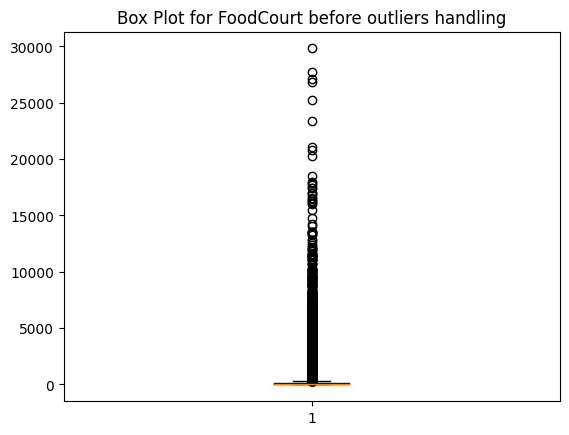

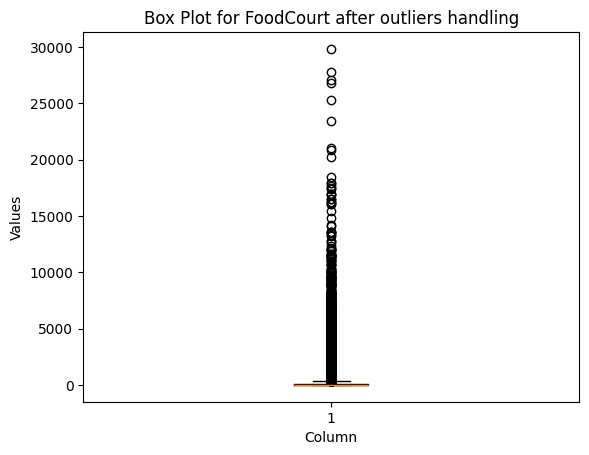

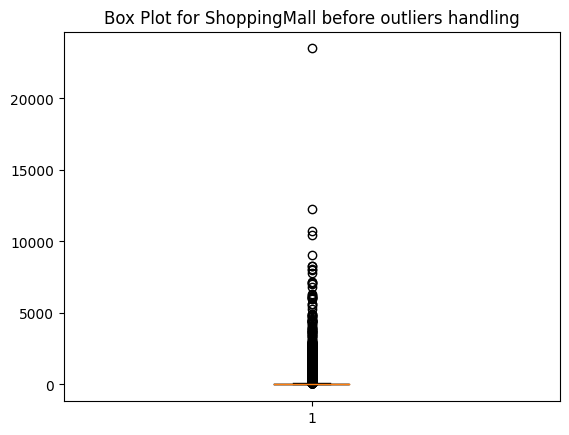

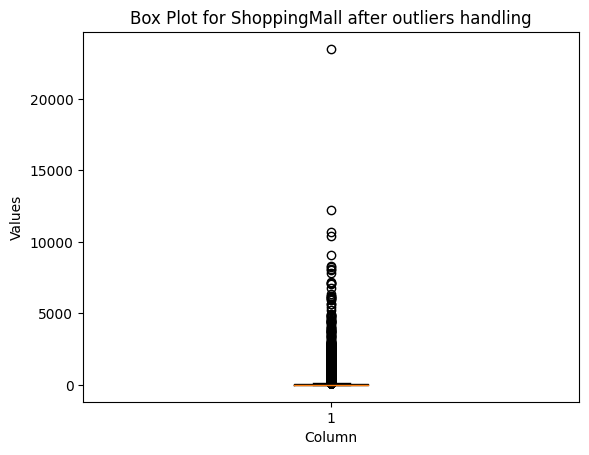

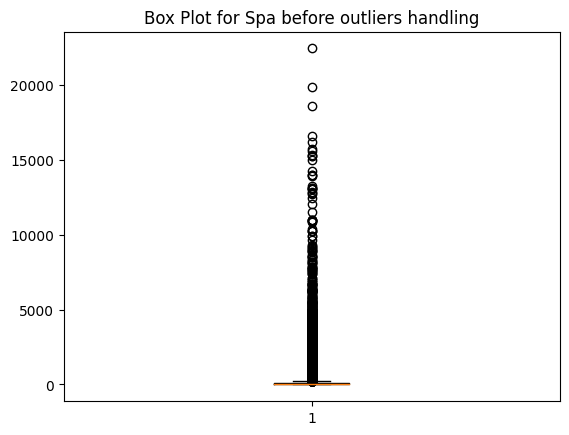

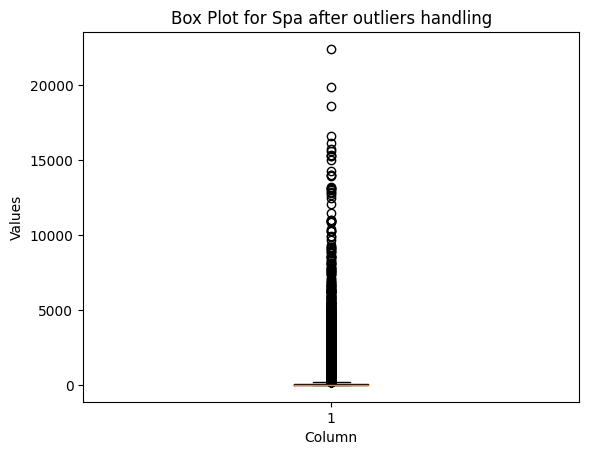

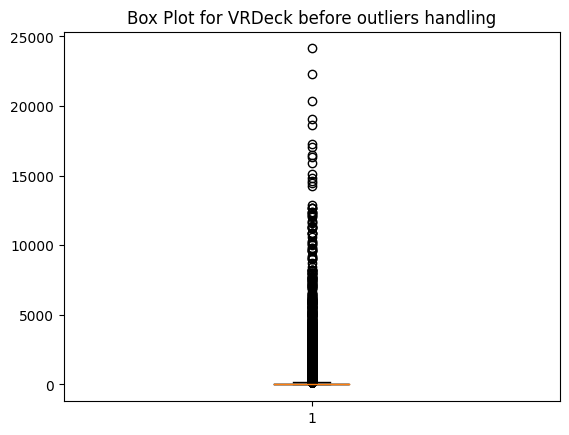

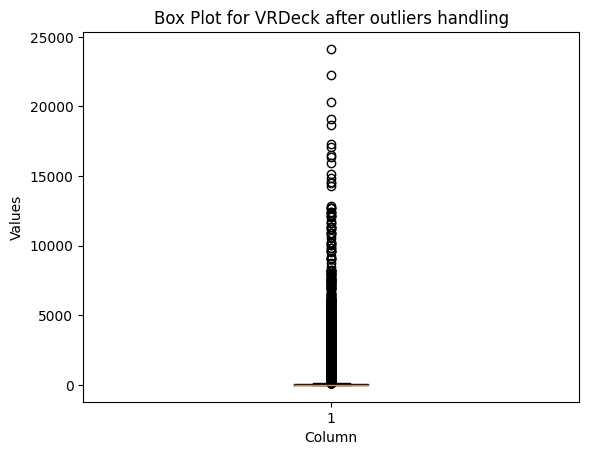

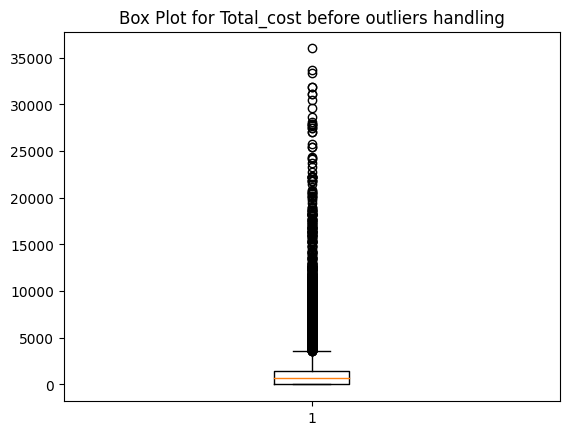

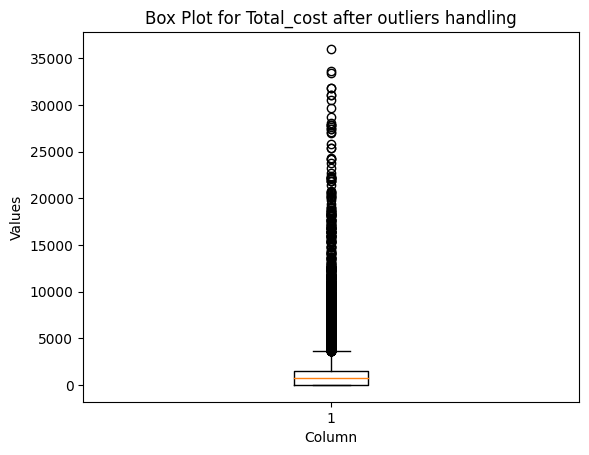

In [125]:
# Create box plots for each numeric column
for column in numeric_columns:
    plt.figure()
    plt.boxplot(df3[column])
    plt.title(f"Box Plot for {column} before outliers handling")
    plt.show()
    plt.boxplot(df3[column])
    plt.title(f"Box Plot for {column} after outliers handling")
    plt.xlabel("Column")
    plt.ylabel("Values")
    plt.show()

In [126]:
numeric_columns = df3.select_dtypes(include=np.number)
numeric_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,12970.0,28.771969,14.236710,0.0,20.0,27.0,37.0,79.0
RoomService,12970.0,222.897852,640.996685,0.0,0.0,0.0,79.0,14327.0
FoodCourt,12970.0,451.961675,1566.618306,0.0,0.0,0.0,126.0,29813.0
ShoppingMall,12970.0,174.906033,583.550067,0.0,0.0,0.0,47.0,23492.0
Spa,12970.0,308.476904,1117.835494,0.0,0.0,0.0,87.0,22408.0
VRDeck,12970.0,306.789482,1167.840416,0.0,0.0,0.0,64.0,24133.0
Total_cost,12970.0,1433.221049,2807.369708,0.0,0.0,716.0,1442.0,35987.0


#### Convert categorical variables to numerical representations
HomePlanet	(288), CryoSleep( 310),VIP (296), Tranported(bool)

In [127]:
from sklearn.impute import SimpleImputer     
# Create an instance of SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='most_frequent') #The 'most_frequent' strategy fills in missing values with the most frequent value in the column in the dataframe   
# Fit the imputer on the data and transform it   
df2['HomePlanet'] = imputer.fit_transform(df3[['HomePlanet']]) 
df2['HomePlanet'].isna().sum()

0

In [129]:
df2['CryoSleep'] = imputer.fit_transform(df3[['CryoSleep']])
df2['CryoSleep'].isna().sum() 

0

In [130]:
df2['VIP'] = imputer.fit_transform(df3[['VIP']])
df2['VIP'].isna().sum() 

0

In [131]:
df2['Destination'] = imputer.fit_transform(df3[['Destination']])
df2['Destination'].isna().sum() 

0

One-hot encoding -----> One Hot Encoding will be used for nominal categorical features

Label encoding ---> LabelEncoding will be used for ordinal categorical features

In [132]:
df3["Transported"].replace({False:0,True:1},inplace=True)
df3["Transported"]

0        0
1        1
2        0
3        0
4        1
        ..
12965    0
12966    0
12967    0
12968    0
12969    0
Name: Transported, Length: 12970, dtype: int64

In [135]:
#HomePlanet
Homeplanet_encoder = LabelEncoder()
df3['HomePlanet_encoder'] = Homeplanet_encoder.fit_transform(df3['VIP'])
df3['HomePlanet_encoder'].head() 

0    0
1    0
2    1
3    0
4    0
Name: HomePlanet_encoder, dtype: int64

In [136]:
cryoSleep_encoder = LabelEncoder()      #CryoSleep
df3['CryoSleep_encoder'] = cryoSleep_encoder.fit_transform(df3['CryoSleep'])
df3['CryoSleep_encoder'].head()   #false=0,  True = 1

0    0
1    0
2    0
3    0
4    0
Name: CryoSleep_encoder, dtype: int64

In [137]:
#VIP
vip_encoder = LabelEncoder()
df3['VIP_encoder'] = vip_encoder.fit_transform(df3['VIP'])
df3['VIP_encoder'].head()       #false=0,  True = 1

0    0
1    0
2    1
3    0
4    0
Name: VIP_encoder, dtype: int64

In [138]:
#Destination
dest_encoder = LabelEncoder()
df3['Destination_encoder'] =dest_encoder.fit_transform(df3['Destination'])
df3['Destination_encoder'].head() 

0    2
1    2
2    2
3    2
4    2
Name: Destination_encoder, dtype: int64

## Step 4: Check for Normality

Perform a normality check on the numerical features to assess if they follow a Gaussian distribution.
Use techniques like histograms, Q-Q plots, or statistical tests (e.g., Shapiro-Wilk test) to check for normality.

If the data is not normally distributed, consider applying appropriate transformations.

In [ ]:
df3

In [ ]:
df3_columns= ['HomePlanet_encoder', 'CryoSleep_encoder', 'Destination_encoder','Age', 'VIP_encoder', 'RoomService', 'FoodCourt', 'ShoppingMall','Spa','VRDeck', 'Total_cost']
df3_num_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall','Spa','VRDeck', 'Total_cost']
df3_cat_columns = ['HomePlanet_encoder', 'CryoSleep_encoder', 'Destination_encoder','Age', 'VIP_encoder']

### categorical values are not tested for normality.


In [ ]:
# Shapiro-Wilk test
# numeric columns selected and Shapiro-Wilk test applied

for columns in df3_num_columns:
    data = df3[columns].dropna()
    data = df3[columns]
    shapiro_stat, shapiro_pvalue = stats.shapiro(data)
    shapiro_normal = shapiro_pvalue > 0.05
    print(f"Column: {columns}")
    print(f"Shapiro-Wilk test - Normal: {shapiro_normal}")

Column: Age
Shapiro-Wilk test - Normal: False
Column: RoomService
Shapiro-Wilk test - Normal: False
Column: FoodCourt
Shapiro-Wilk test - Normal: False
Column: ShoppingMall
Shapiro-Wilk test - Normal: False
Column: Spa
Shapiro-Wilk test - Normal: False
Column: VRDeck
Shapiro-Wilk test - Normal: False
Column: Total_cost
Shapiro-Wilk test - Normal: False


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


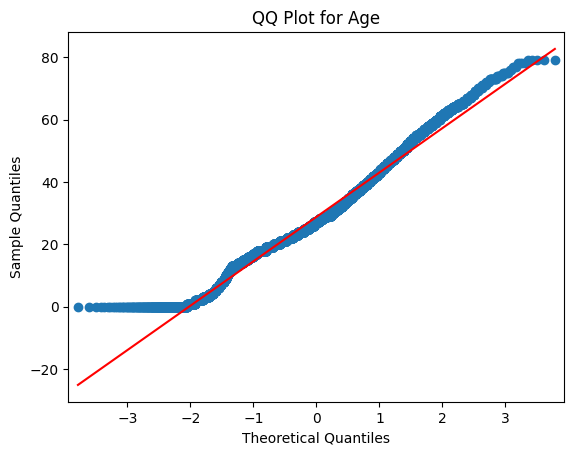

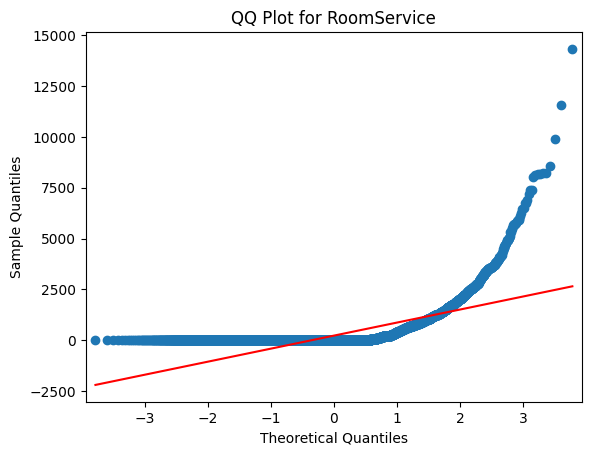

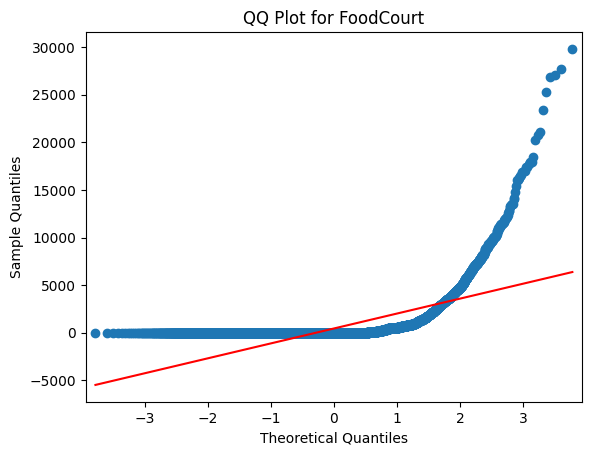

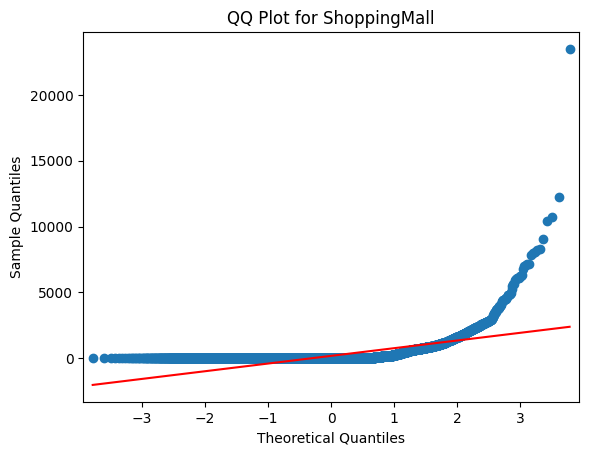

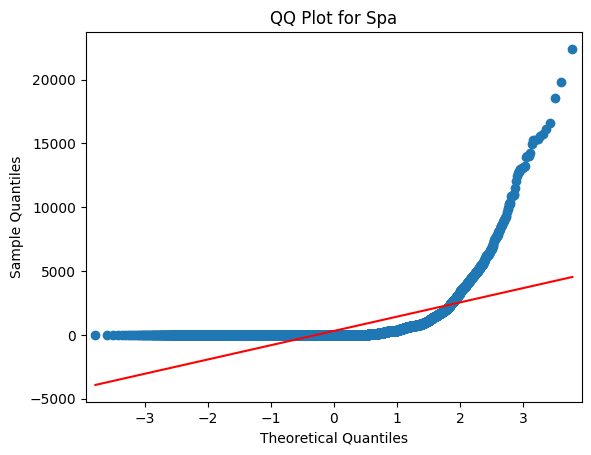

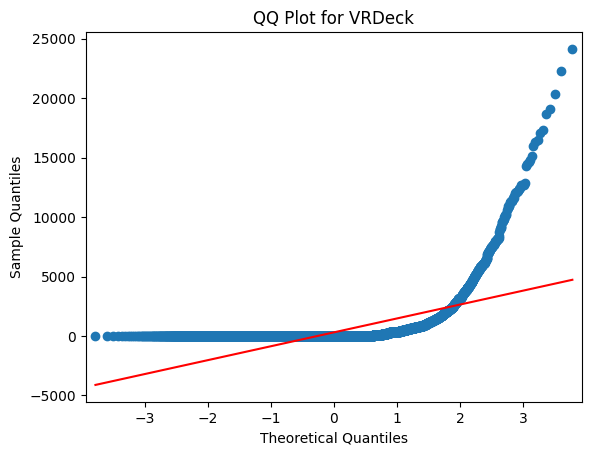

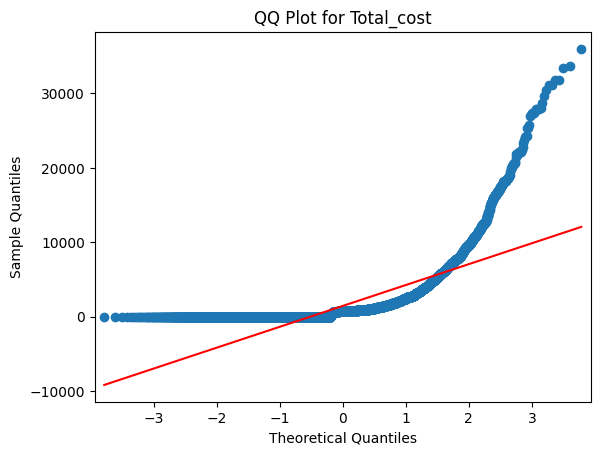

In [ ]:
# normlaty check qq plot
for columns in df3_num_columns :
    # Create QQ plot
    sm.qqplot(df3[columns], line='s')
    plt.title(f"QQ Plot for {columns}")
    plt.show()

## Step 5: Apply Transformations

Apply transformations to the data if required, based on the normality check results.

Common transformations include:

* Logarithmic transformation: Use when data is positively skewed.
* Square root transformation: Use when data has a moderate positive skew.
* Power transformation: Use when data has a severe positive or negative skew.

Apply the chosen transformation(s) to the appropriate features.

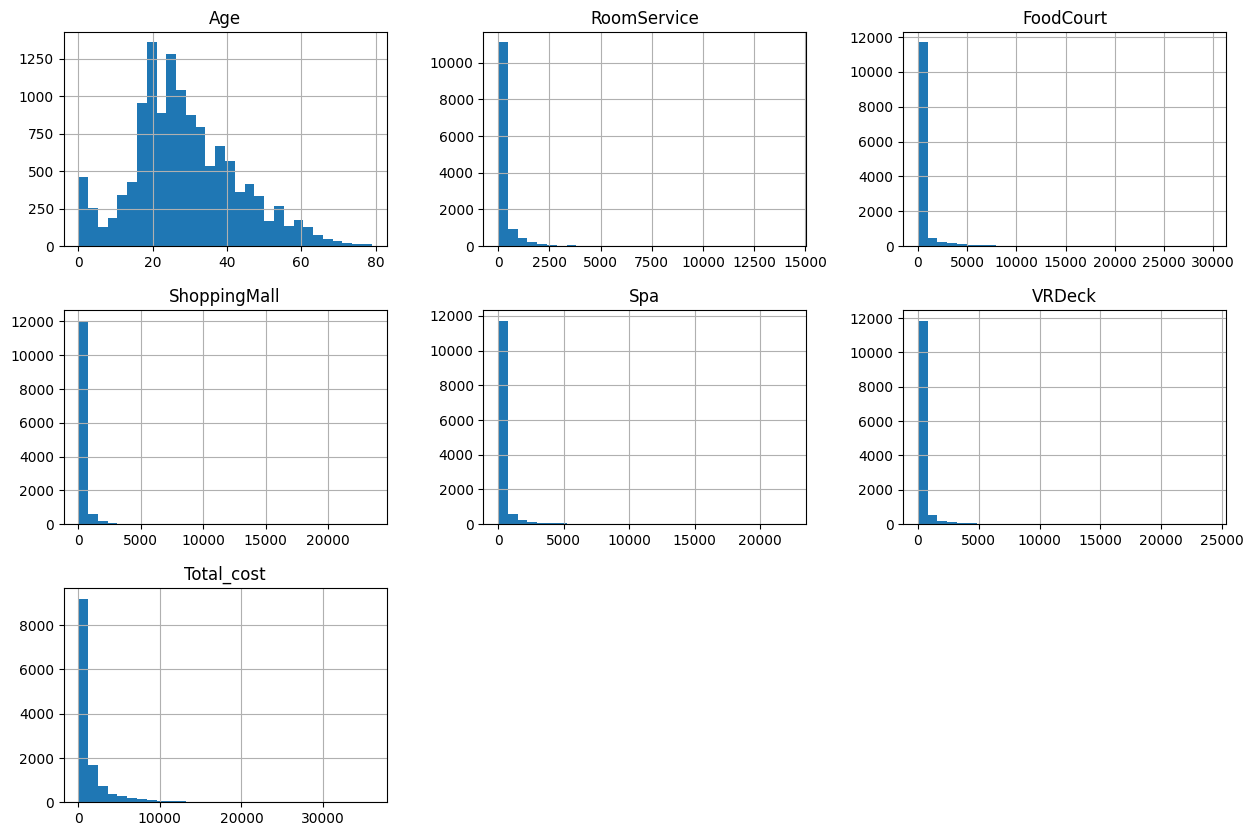

In [139]:
df3[df3_num_columns].hist(bins=30, figsize=(15, 10))
plt.show()

### Transformation operations are also applied only to numeric columns.

### Transformation

In [157]:
df3_num_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall','Spa','VRDeck', 'Total_cost']
def transformation_numerical_columns(column): 
    # Select only the numeric columns
    numeric_data = df3[df3_num_columns ]
    # Perform logarithmic transformation on each numeric column
    log_transformed_df = np.log1p(numeric_data)
    sqrt_transformed_df = np.sqrt(numeric_data)
    power_transformed_df = np.power(numeric_data, 2)

    plt.figure(figsize=(7, 3))

    plt.subplot(2, 2, 1)
    plt.hist(numeric_data[column], bins=20)
    plt.title(f'{column} in Original Data')
    # Plot Logarithmic Transformation
    plt.subplot(2, 2, 2)
    plt.hist(log_transformed_df[column], bins=20)
    plt.title(f'{column} in Logarithmic Transformation')
    # Plot Square Root Transformation
    plt.subplot(2, 2, 3)
    plt.hist(sqrt_transformed_df[column], bins=20)
    plt.title(f'{column} in Square Root Transformation')
    # Plot Power Transformation
    plt.subplot(2, 2, 4)
    plt.hist(power_transformed_df[column], bins=20)
    plt.title(f'{column} in Power Transformation')

    plt.tight_layout()
    plt.show()

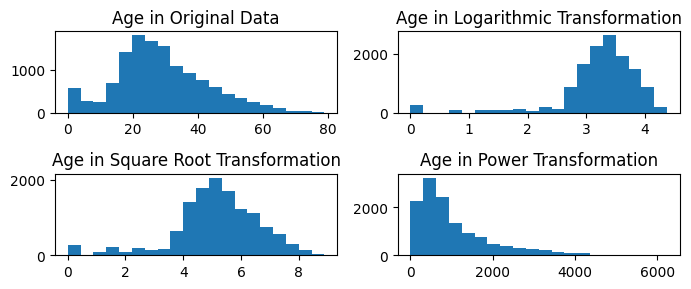

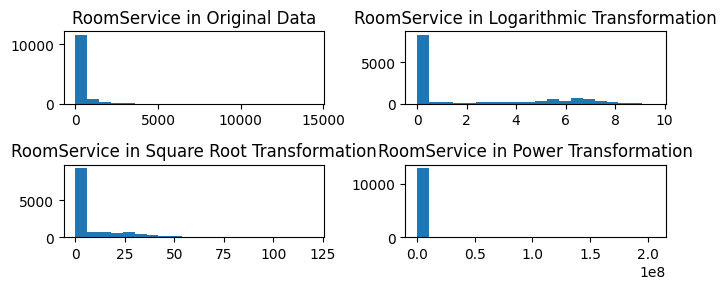

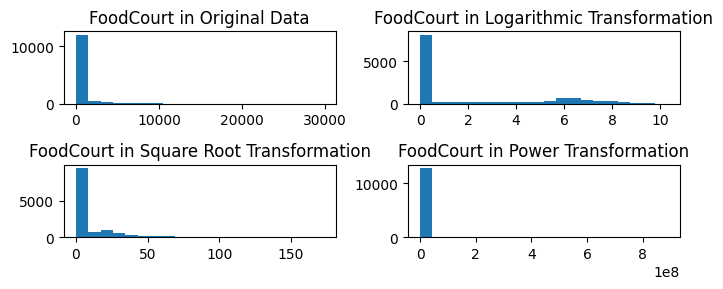

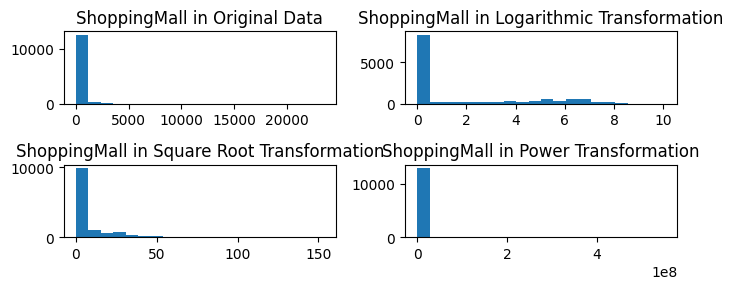

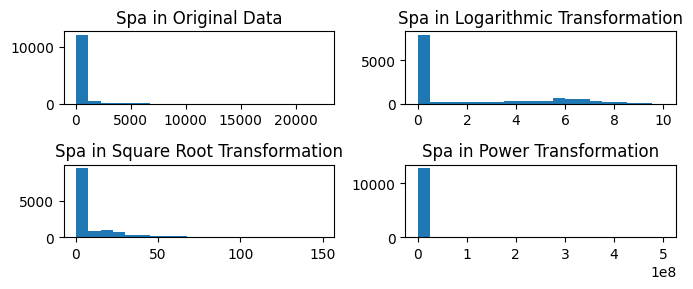

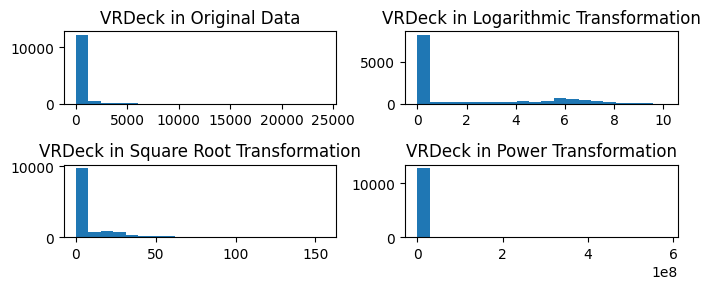

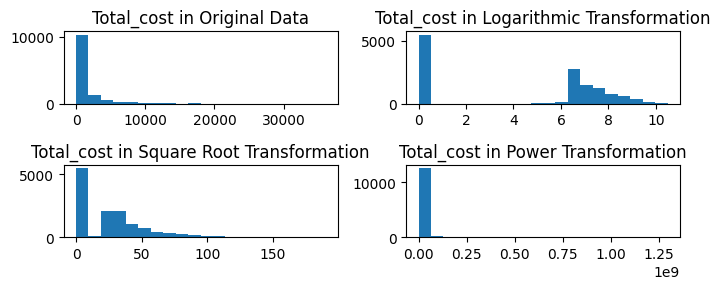

In [158]:
# Transformation operations for numeric columns
for column in df3_num_columns :
    transformation_numerical_columns(column)

In [160]:
# Transformation
df3_num_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall','Spa','VRDeck', 'Total_cost']
numeric_data = df3[df3_num_columns]
log_transformed_df3 = np.log1p(numeric_data)
sqrt_transformed_df3 = np.sqrt(numeric_data)
power_transformed_df3 = np.power(numeric_data, 2)

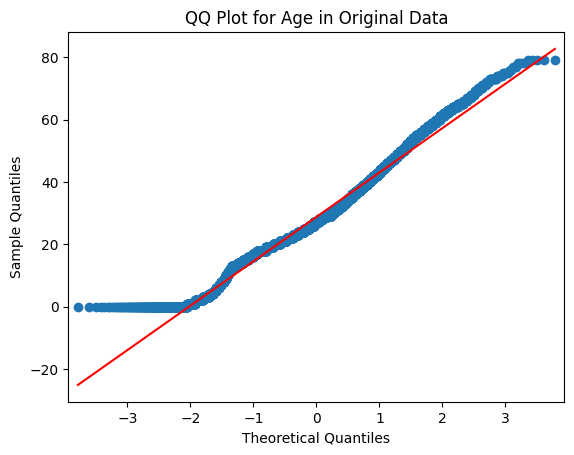

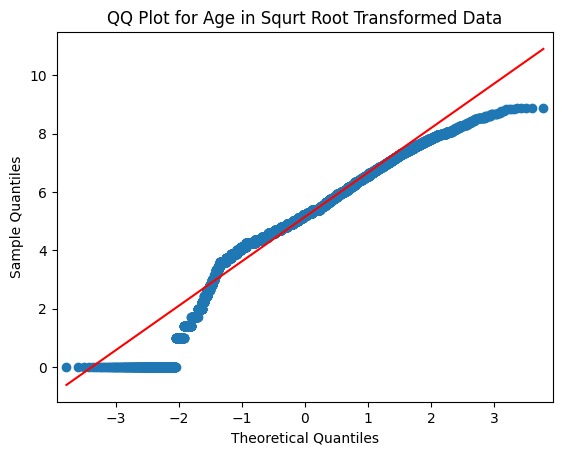

In [161]:
sm.qqplot(df3['Age'], line='s')
plt.title(f"QQ Plot for {'Age'} in Original Data")
plt.show()
sm.qqplot(sqrt_transformed_df3['Age'], line='s')
plt.title(f"QQ Plot for {'Age'} in Squrt Root Transformed Data")
plt.show()


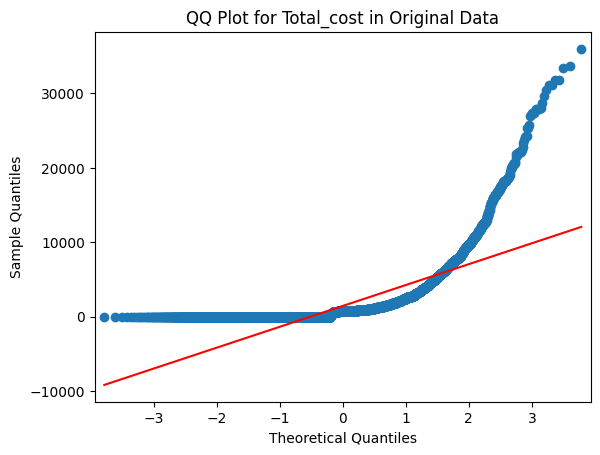

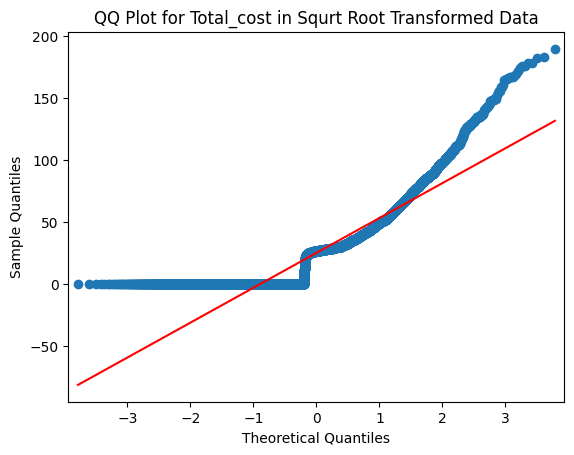

In [162]:
# Total_cost
sm.qqplot(df3['Total_cost'], line='s')
plt.title(f"QQ Plot for {'Total_cost'} in Original Data")
plt.show()
sm.qqplot(sqrt_transformed_df3['Total_cost'], line='s')
plt.title(f"QQ Plot for {column} in Squrt Root Transformed Data")
plt.show()

<Figure size 640x480 with 0 Axes>

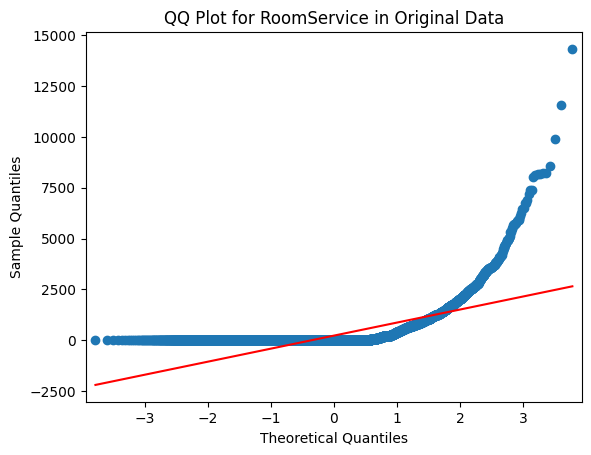

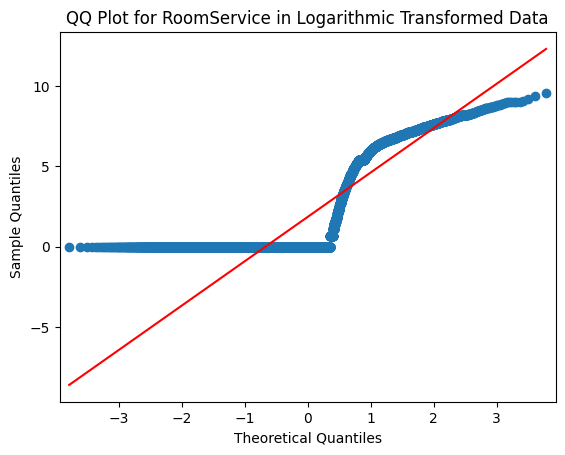

<Figure size 640x480 with 0 Axes>

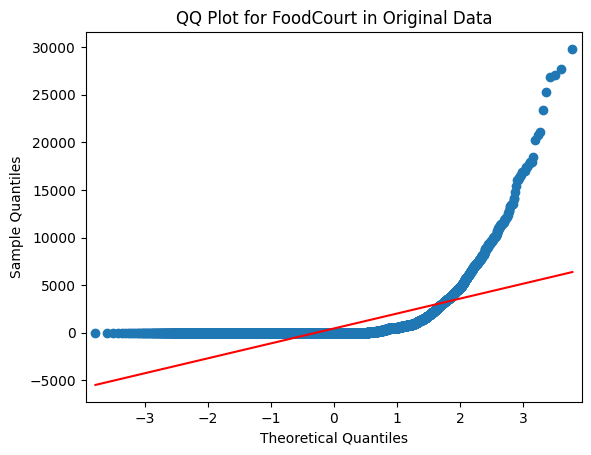

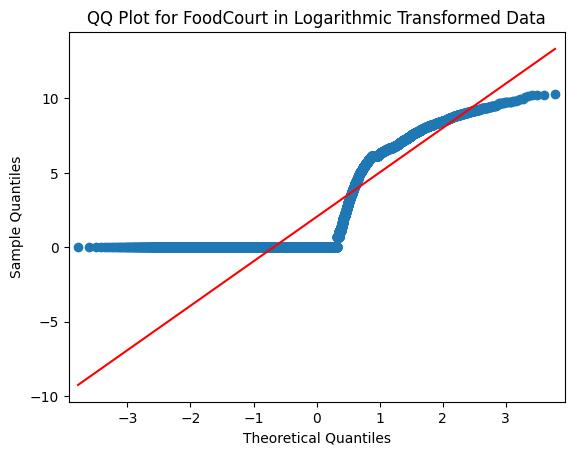

<Figure size 640x480 with 0 Axes>

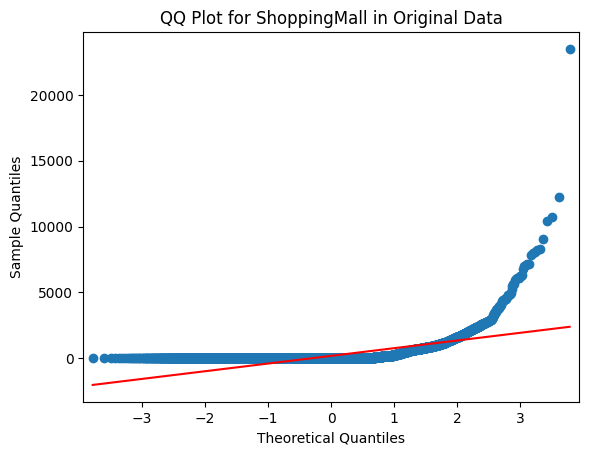

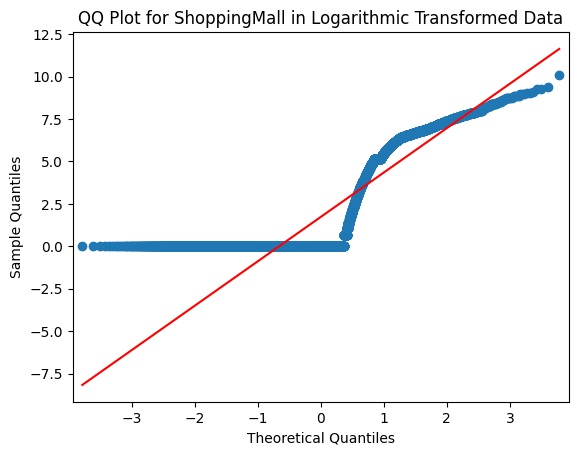

<Figure size 640x480 with 0 Axes>

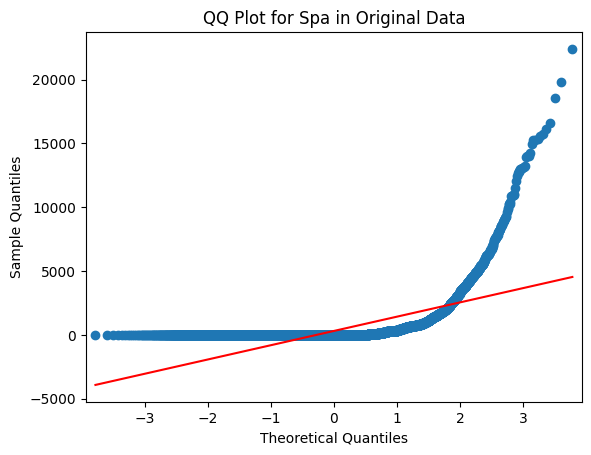

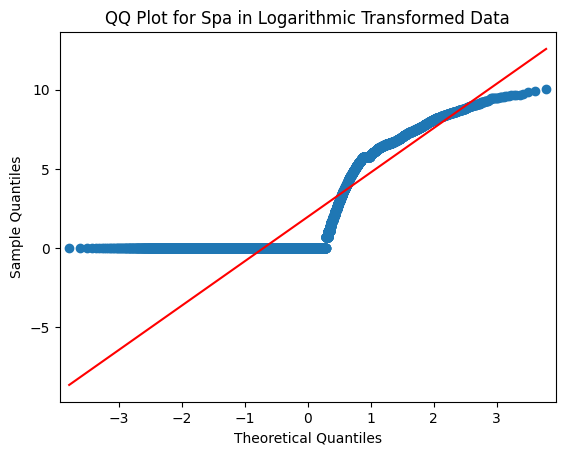

<Figure size 640x480 with 0 Axes>

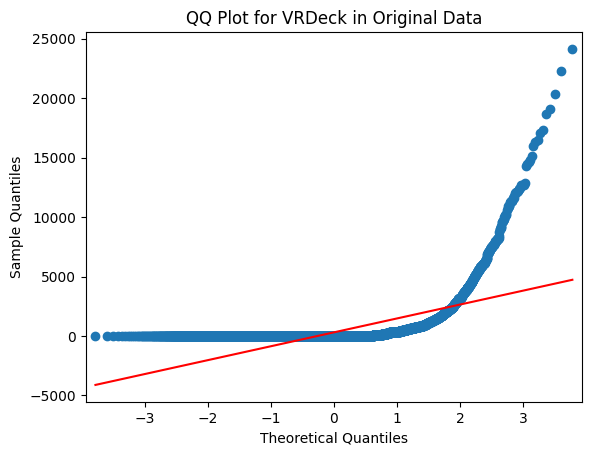

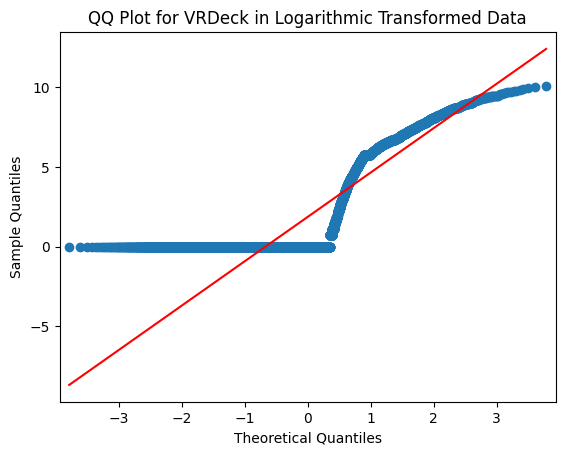

In [163]:
# 
col = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", ]
for column in col:
    plt.figure()
    sm.qqplot(df3[column], line='s')
    plt.title(f"QQ Plot for {column} in Original Data")
    sm.qqplot(log_transformed_df3[column], line='s')
    plt.title(f"QQ Plot for {column} in Logarithmic Transformed Data")
    plt.show()
# sm.qqplot(sqrt_transformed_df3['Total_cost'], line='s')
# plt.title(f"QQ Plot for {column} in Squrt Root  Transformed Data")
# plt.show()

In [164]:
  
df3[['Age', 'Total_cost']] = sqrt_transformed_df3[['Age', 'Total_cost']]


### Explanation:
Operations after transformation will be continued with 'Age' and 'Total_cost' columns.

### Normalize or scale numerical features 

In [165]:
df3_num_columns = ['Age', 'Total_cost']

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df3[df3_num_columns])
data_scaled = pd.DataFrame(data_scaled, columns=df3_num_columns)
data_scaled.head()

,Age,Total_cost
0,0.702617,0.000000
1,0.551178,0.143010
2,0.856841,0.537141
3,0.646314,0.379249
4,0.450035,0.174116


## Step 6: Split the Data

Split the preprocessed and transformed data into training and testing sets.
Typically, use around 70-80% of the data for training and the remaining for testing.

In [167]:
# Columns are discarded when not using data without splitting
columns_to_remove = ['PassengerId','Cabin','Name']
df3 = df3.drop(columns_to_remove, axis=1)
df3.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Total_cost,HomePlanet_encoder,CryoSleep_encoder,VIP_encoder,Destination_encoder
0,Europa,False,TRAPPIST-1e,6.244998,False,0.0,0.0,0.0,0.0,0.0,0,0.000000,0,0,0,2
1,Earth,False,TRAPPIST-1e,4.898979,False,109.0,9.0,25.0,549.0,44.0,1,27.129320,0,0,0,2
2,Europa,False,TRAPPIST-1e,7.615773,True,43.0,3576.0,0.0,6715.0,49.0,0,101.897007,1,0,1,2
3,Europa,False,TRAPPIST-1e,5.744563,False,0.0,1283.0,371.0,3329.0,193.0,0,71.944423,0,0,0,2
4,Earth,False,TRAPPIST-1e,4.000000,False,303.0,70.0,151.0,565.0,2.0,1,33.030289,0,0,0,2


In [168]:
X = data_scaled
y = df3['Transported']

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# See size of training and test sets
print("training_size:", len(X_train))
print("test_size:", len(X_test))

training_size: 10376
test_size: 2594


In [170]:
X_train

,Age,Total_cost
12054,0.573685,0.000000
12367,0.515580,0.299684
2372,0.297670,0.000000
3038,0.605878,0.000000
4122,0.000000,0.000000
...,...,...
11964,0.779484,0.156642
5191,0.795557,0.230380
5390,0.527713,0.135425
860,0.656033,0.236039


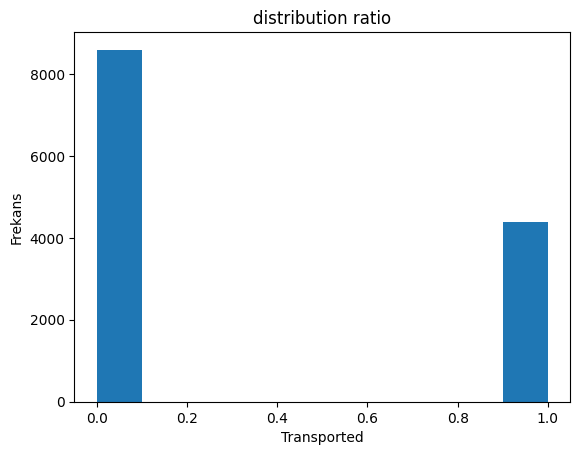

In [171]:
plt.hist(y)
plt.xlabel('Transported')
plt.ylabel('Frekans')
plt.title('distribution ratio')
plt.show()

In [172]:
#target distribution
frequency_table = pd.DataFrame({'Transported': y})
frequency_counts = frequency_table['Transported'].value_counts() # value_counts fonksiyonuile frekans dagilimi 
frequency_counts 

0    8592
1    4378
Name: Transported, dtype: int64

Explanation:
The distribution of the target was checked with the value_counts method and histogram. 
It was seen that the target distribution was not 50%-50%

## Step 7: Select a Suitable Algorithm

Determine the appropriate algorithm(s) for this binary classification problem.
Consider algorithms like **Logistic Regression, Decision Trees, Random Forests, or .Support Vector Machines**
Choose an algorithm that suits the problem requirements and constraints.

In [189]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

rf = RandomForestClassifier()   #Random Forest modelinin bir örneğini oluşturuyoruz.
#training the model
rf.fit(X_train, y_train)
#Making predictions using the test dataset
y_pred = rf.predict(X_test) 

rf_f1 = f1_score(y_test, y_pred)
rf_f1

0.4662857142857143

In [190]:
# Logistik Regresyon
from sklearn.linear_model import LogisticRegression


lg = LogisticRegression()
#training the model
lg.fit(X_train, y_train)
#Making predictions using the test dataset
y_pred = lg.predict(X_test)

#from sklearn.metrics import classification_report # test etme asamasi
#print(classification_report(y_test, y_pred))
lg_f1 = f1_score(y_test, y_pred)
lg_f1



0.0

In [187]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier 

dtree= DecisionTreeClassifier()
#training the model
dtree.fit(X_train, y_train)
#Making predictions using the test dataset
y_pred = dtree.predict(X_test)
dtree_f1 = f1_score(y_test, y_pred)
dtree_f1



0.46547036432843936

In [188]:
# Support Vector Machines
from sklearn.svm import SVC

svm = SVC()
##training the model
svm.fit(X_train, y_train)
##Making predictions using the test dataset
y_pred = svm.predict(X_test)

svm_f1 = f1_score(y_test, y_pred)
svm_f1


0.5183431952662721

In [206]:
# K-Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


#f1_score
knn_f1 = f1_score(y_test, y_pred)
knn_f1

0.3553299492385787

## Step 8: Train the Model

Train the selected algorithm on the training dataset.
Adjust hyperparameters if necessary to optimize model performance.
Evaluate the model's performance using suitable metrics (accuracy, precision, recall, etc.).

### F1 score will be used as the target distribution is not 50-50%

In [195]:
from sklearn.metrics import f1_score

# # Random Forests
# rf_f1 = f1_score(y_test, y_pred)

# Logistic Regression
#lg_f1 = f1_score(y_test, y_pred)

# # Decision Trees
# dtree_f1 = f1_score(y_test, y_pred)

# # Support Vector Machines
# svm_f1 = f1_score(y_test, y_pred)

#K-Nearest Neighbor Classifier
#knn_f1 = f1_scorey_test, y_pred)

## the regular version of the f1_score codes above

print("Random Forests F1 Score:", rf_f1)
print("Logistic Regression F1 Score:", lg_f1)
print("Decision Trees F1 Score:", dtree_f1)
print("Support Vector Machines F1 Score:", svm_f1)
print("Nearest Neighbor Classifier F1 Score:", knn_f1)



Random Forests F1 Score: 0.4662857142857143
Logistic Regression F1 Score: 0.0
Decision Trees F1 Score: 0.46547036432843936
Support Vector Machines F1 Score: 0.5183431952662721
Nearest Neighbor Classifier F1 Score: 0.3553299492385787


# Step 9: Validate the Model

Use the testing dataset to validate the model's performance.
Calculate the same metrics as in step 8 to assess the model's accuracy and generalization ability.
Identify any issues like overfitting or underfitting.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [210]:
# Random Forest 
y_pred = rf.predict(X_test) 

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("Accuracy Score:", accuracy)

Precision Score: 0.4733178654292343
Recall Score: 0.4594594594594595
F1 Score: 0.4662857142857143
Accuracy Score: 0.6399383191981496


In [211]:
# Logistik Regresyon
y_pred = lg.predict(X_test) 

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("Accuracy Score:", accuracy)

Precision Score: 0.0
Recall Score: 0.0
F1 Score: 0.0
Accuracy Score: 0.6576715497301465


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [214]:
#Decision Trees
y_pred = dtree.predict(X_test) 

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("Accuracy Score:", accuracy)

Precision Score: 0.4500525762355415
Recall Score: 0.481981981981982
F1 Score: 0.46547036432843936
Accuracy Score: 0.6210485736314572


In [212]:
# Support Vector Machines

y_pred = svm.predict(X_test) 

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("Accuracy Score:", accuracy)

Precision Score: 0.5461346633416458
Recall Score: 0.49324324324324326
F1 Score: 0.5183431952662721
Accuracy Score: 0.6861989205859677


In [213]:
# K-Nearest Neighbor Classifier
y_pred = knn.predict(X_test) 

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("Accuracy Score:", accuracy)

Precision Score: 0.4989816700610998
Recall Score: 0.2759009009009009
F1 Score: 0.3553299492385787
Accuracy Score: 0.6572860447185813


## Step 10: Fine-tune and Optimize the Model

If needed, fine-tune the model by adjusting hyperparameters or trying different algorithms.
Employ techniques like cross-validation or grid search to find the best hyperparameters.
Iterate this process until you achieve satisfactory performance.

# 
F1 Skore ve accuracy sonuclari en yüksek model : Support Vectöre Mashine

### cross validation 

In [215]:
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold  # daha fazla k-fold ayari yapmak icin
from sklearn.linear_model import LogisticRegression

In [216]:
model = SVC()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.680609097918273

In [217]:
neu_score = cross_val_score(model, X, y, cv=5) 
neu_score 

array([0.68542791, 0.67000771, 0.66808019, 0.60832691, 0.60678489])

In [218]:
neu_score.mean() # scorelarin ortalamasi

0.6477255204317656

## Step 11: Evaluate the Final Model

Evaluate the final model on the testing dataset once again.
Calculate relevant metrics to assess the model's accuracy, precision, recall, etc.
Interpret the model's predictions and document the results.


In [221]:
y_pred = svm.predict(X_test)

In [226]:
from sklearn import metrics

#F1 skore
f1_score = metrics.f1_score(y_test, y_pred)
#accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
#recalll
recall = metrics.recall_score(y_test, y_pred)
#precision
precision = metrics.precision_score(y_test, y_pred)

print(f' SVM F1 Score {f1_score}:')
print(f' SVM Accuracy {accuracy}:')
print(f' SVM Recall {recall}:')
print(f' SVM Precision {precision}:')

'''
F1 Score: 0.5183431952662721
Accuracy Score: 0.6861989205859677
Recall Score: 0.49324324324324326
Precision Score: 0.5461346633416458
'''


 SVM F1 Score 0.5183431952662721:
 SVM Accuracy 0.6861989205859677:
 SVM Recall 0.49324324324324326:
 SVM Precision 0.5461346633416458:


In [223]:
#precision
from sklearn.metrics import precision_score
precision = metrics.precision_score(y_test, y_pred)
precision

0.5461346633416458

In [224]:
#recalll
recall = metrics.recall_score(y_test, y_pred)
recall

0.49324324324324326

## Step 12: Communicate the Findings

Prepare a report or presentation summarizing the project's objectives, methodology, and results.
Clearly communicate the insights gained from the model, such as the importance of different features in predicting survival.
Provide recommendations or potential applications based on the findings.

A data analysis was conducted in which the impact and importance of different parameters in predicting passenger survival.

## Step 13: Reflect and Learn

Reflect on the entire process and discuss the strengths and limitations of the project.
Identify areas for improvement and suggest future work or possible enhancements.
Share any lessons learned from the project to inform future endeavors.
Remember, adapt this guide based on the specific requirements and learning goals of your charity data bootcamp organization.

Random Forests, Logistic Regression
Decision Trees, Support Vector Machine, Nearest Neighbor Classifier models were examined. Support Vector Machine was selected for the best F1 score result. Total_cost column was selected and it saves time.